In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import cv2
from exif import Image

In [11]:
# Define image path
img_filename = 'image.jpeg'
image = f'{img_filename}'

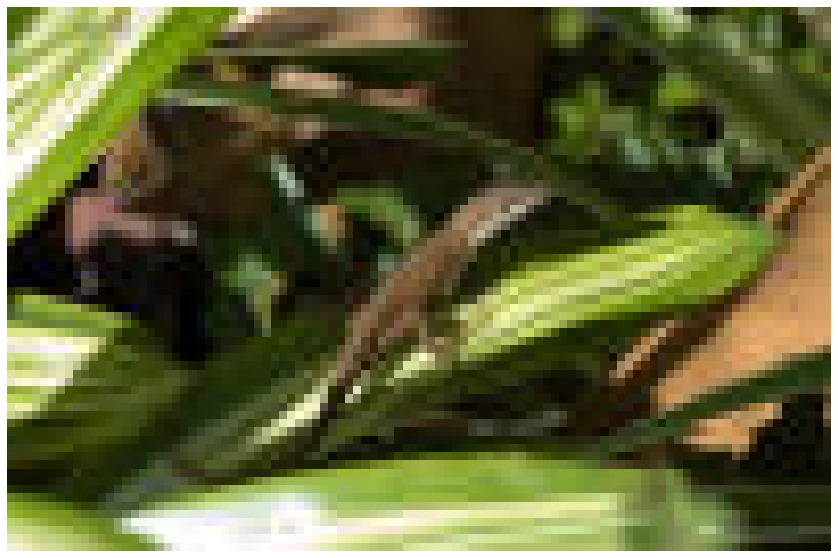

In [12]:
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (20,10)
plt.axis('off')
plt.imshow(img);

In [13]:
with open(image, 'rb') as img_file:
    img = Image(img_file)

In [14]:
img.has_exif

True

In [15]:
# List all EXIF tags contained in the image
sorted(img.list_all())

['_exif_ifd_pointer',
 'aperture_value',
 'color_space',
 'compression',
 'datetime',
 'datetime_original',
 'exposure_bias_value',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'focal_length',
 'focal_length_in_35mm_film',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'make',
 'max_aperture_value',
 'metering_mode',
 'model',
 'orientation',
 'photographic_sensitivity',
 'pixel_x_dimension',
 'pixel_y_dimension',
 'resolution_unit',
 'shutter_speed_value',
 'software',
 'x_resolution',
 'y_resolution']

In [16]:
# List all methods and attribute tags
dir(img)

['_exif_ifd_pointer',
 '_segments',
 'aperture_value',
 'color_space',
 'compression',
 'datetime',
 'datetime_original',
 'delete',
 'delete_all',
 'exposure_bias_value',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'focal_length',
 'focal_length_in_35mm_film',
 'get',
 'get_all',
 'get_file',
 'get_thumbnail',
 'has_exif',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'list_all',
 'make',
 'max_aperture_value',
 'metering_mode',
 'model',
 'orientation',
 'photographic_sensitivity',
 'pixel_x_dimension',
 'pixel_y_dimension',
 'resolution_unit',
 'shutter_speed_value',
 'software',
 'x_resolution',
 'y_resolution']

In [17]:
# Make of device which captured image
print(f'Make: {img.get("make")}')

# Model of device which captured image
print(f'Model: {img.get("model")}')

# Software involved in uploading and digitizing image
print(f'Software: {img.get("software")}')

# Name of photographer who took the image
print(f'Artist: {img.get("artist")}')

# Original datetime that image was taken (photographed)
print(f'DateTime (Original): {img.get("datetime_original")}')

# Details of flash function
print(f'Flash Details: {img.get("flash")}')

Make: NIKON CORPORATION
Model: NIKON D70
Software: GIMP 2.4.5
Artist: None
DateTime (Original): 2008:03:15 09:52:01
Flash Details: Flash(flash_fired=False, flash_return=FlashReturn.NO_STROBE_RETURN_DETECTION_FUNCTION, flash_mode=FlashMode.UNKNOWN, flash_function_not_present=False, red_eye_reduction_supported=False, reserved=0)


In [21]:
def get_metadata_single(image):
    with open(image, 'rb') as img_file:
        img = Image(img_file)
        if not img.has_exif:
            print('Image does not have EXIF metadata')
        else:
            df = pd.DataFrame(columns=['attribute', 'value'])
            attr_list = img.list_all()
            
            # Add image file name
            df = df.append({'attribute': 'image_path',
                           'value': image}, 
                           ignore_index=True)
            
            for attr in attr_list:
                value = img.get(attr)
                dict_i = {'attribute': attr,
                         'value': value}
                df = df.append(dict_i, ignore_index=True)
            
            df.sort_values(by='attribute', inplace=True)
            df.set_index('attribute', inplace=True)
            return df
metadata_df = get_metadata_single(image)
metadata_df

,value
attribute,
_exif_ifd_pointer,198
aperture_value,6.33985
color_space,1
compression,6
datetime,2008:07:31 10:03:44
datetime_original,2008:03:15 09:52:01
exposure_bias_value,-1.0
exposure_program,1
exposure_time,0.005


In [23]:
metadata_df = get_metadata_single(image)
metadata_df

,value
attribute,
_exif_ifd_pointer,198
aperture_value,6.33985
color_space,1
compression,6
datetime,2008:07:31 10:03:44
datetime_original,2008:03:15 09:52:01
exposure_bias_value,-1.0
exposure_program,1
exposure_time,0.005
